In [33]:
from sklearn.datasets import fetch_20newsgroups
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

newsData = fetch_20newsgroups()
newsData.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [34]:
twenty_train = fetch_20newsgroups(subset='train', shuffle=True, remove=('headers', 'footers'))
twenty_test = fetch_20newsgroups(subset='test', shuffle=True, remove=('headers', 'footers'))
print('Length train: '+ str(len(twenty_train.data)))
print('Length test: '+ str(len(twenty_test.data)))

Length train: 11314
Length test: 7532


In [35]:
for i in range(5):
    print('NEW DATA')
    print(twenty_train.data[i]) 

NEW DATA
I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.
NEW DATA
A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't ans

In [36]:
count_vectorizer = CountVectorizer()
matrix = count_vectorizer.fit_transform(twenty_train.data)

In [37]:
def plot_bar_chart(P, vocabulary = None, title='title'):
    N = len(P)
    plt.figure(figsize=(20, 5)) # Tamaño del gráfico
    indexes = list(range(1, len(P) + 1))
    plt.bar(indexes, P, width=0.75, color='b') # Grafico
    plt.title(title)

    # Definición de indices
    if not vocabulary:
        string_indexes = [str(i) for i in indexes]
    else:
        string_indexes = [vocabulary[i-1] for i in indexes]
    plt.xlim([0,N+1])
    plt.xticks(indexes, string_indexes) 
    plt.xticks(rotation=60)
    plt.show()

In [38]:
def get_words_distribution_from_matrix(alpha, feature_matrix):
    # Alpha es para suavizar y evitar la probabilidad cero. Normalmente 1
    # Es como agregar un mail con todas las palabras
    words_distribution_un = feature_matrix.sum(axis=0) + alpha
    words_distribution = words_distribution_un/(words_distribution_un.sum() + alpha*feature_matrix.shape[1])
    return words_distribution * 500

In [39]:
print('Matrix shape: ' + str(matrix.shape))
print(matrix[0])

Matrix shape: (11314, 114751)
  (0, 108644)	4
  (0, 110106)	1
  (0, 57577)	2
  (0, 24398)	2
  (0, 79534)	1
  (0, 100942)	1
  (0, 37154)	1
  (0, 45141)	1
  (0, 70570)	1
  (0, 78701)	2
  (0, 101084)	4
  (0, 32499)	4
  (0, 92157)	1
  (0, 100827)	6
  (0, 79461)	1
  (0, 39275)	1
  (0, 60326)	2
  (0, 42332)	1
  (0, 96432)	1
  (0, 67137)	1
  (0, 101732)	1
  (0, 27703)	1
  (0, 49871)	2
  (0, 65338)	1
  (0, 14106)	1
  :	:
  (0, 78264)	2
  (0, 29357)	1
  (0, 60116)	2
  (0, 23323)	1
  (0, 64083)	1
  (0, 32305)	1
  (0, 100406)	1
  (0, 72915)	1
  (0, 75280)	1
  (0, 45089)	1
  (0, 96145)	1
  (0, 112936)	1
  (0, 84398)	1
  (0, 109294)	1
  (0, 68931)	1
  (0, 55453)	1
  (0, 79055)	1
  (0, 109254)	1
  (0, 58842)	1
  (0, 113262)	1
  (0, 54442)	1
  (0, 50165)	1
  (0, 67140)	1
  (0, 82759)	1
  (0, 69080)	1


In [40]:
print(twenty_train.target_names[7])

rec.autos


In [41]:
import numpy as np

nptarget = np.array(twenty_train.target)
nptargetnames = np.array(twenty_train.target_names)

labels = np.asarray(nptargetnames[nptarget] =='rec.sport.hockey')
#print(np.count_nonzero(labels))

atheism = matrix[labels,:]

# words_distribution_un = feature_matrix.sum(axis=0) + alpha
#     words_distribution = words_distribution_un/(words_distribution_un.sum() + alpha*feature_matrix.shape[1])

atheism_words_distribution = get_words_distribution_from_matrix(20, atheism)


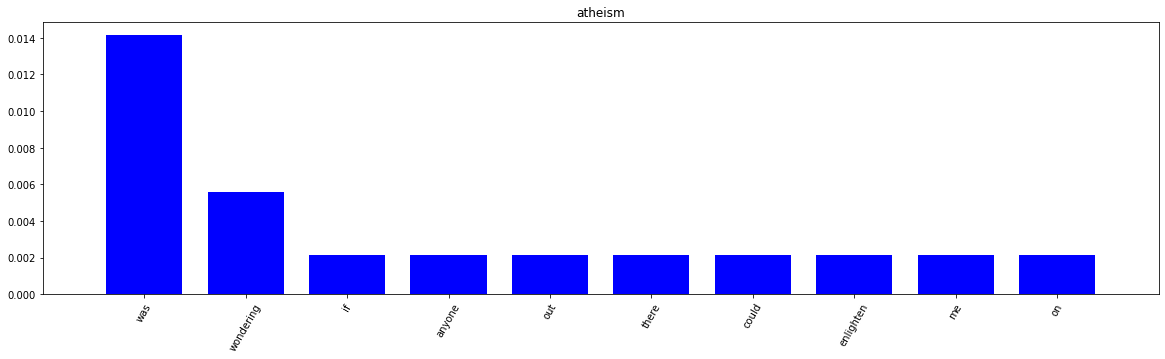

In [42]:
N = 10
plot_bar_chart(np.array(atheism_words_distribution)[0][:N],
                vocabulary = list(count_vectorizer.vocabulary_.keys()),
               title='atheism')

In [45]:
# Veamos si el primer email es SPAM o no
# El primer mail corresponde a la primer fila de la matriz
row = matrix[0,:]
print('Primer email codificado:')
non_zero_row = row.nonzero()
print('Elementos distintos de cero:',non_zero_row[1])
print(matrix[non_zero_row])
print('Producto, no es necesario [P(Y) = P(SPAM) = P(HAM)] por que es para ambos casos igual. Lo mismo el denominador')
print(np.power(atheism_words_distribution[non_zero_row], matrix[non_zero_row]).prod())

print('Log likelihood')
print(np.log(atheism_words_distribution[non_zero_row])*matrix[non_zero_row].T)


Primer email codificado:
Elementos distintos de cero: [108644 110106  57577  24398  79534 100942  37154  45141  70570  78701
 101084  32499  92157 100827  79461  39275  60326  42332  96432  67137
 101732  27703  49871  65338  14106  43643  15549  32194  30093  42333
 109086  87690  95225  58321  22088  49881  30629  93304  89161  78264
  29357  60116  23323  64083  32305 100406  72915  75280  45089  96145
 112936  84398 109294  68931  55453  79055 109254  58842 113262  54442
  50165  67140  82759  69080]
[[4 1 2 2 1 1 1 1 1 2 4 4 1 6 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
Producto, no es necesario [P(Y) = P(SPAM) = P(HAM)] por que es para ambos casos igual. Lo mismo el denominador
1.6533225350994777e-145
Log likelihood
[[-333.37205156]]


In [44]:
(1500/140000) ** (89*1.1)

1.3595637254713202e-193